In [ ]:
# LOADING DATA

In [1]:
import pandas as pd
import numpy as np

print('Loading data...\n')
df_train = pd.read_csv('Beauty_TRAIN.csv')
df_test = pd.read_csv('Beauty_TEST.csv')
df_train.head()

Loading data...



,Unnamed: 0,X,y
0,22157,"This product is impressive. Silky smooth, ver...",1
1,19504,The key to using SLS free shampoo is to add wa...,1
2,23700,i know there is some bad reviews of this on he...,1
3,13943,My husband and I both tried this dandruff sham...,1
4,4219,This glue is really strong and dries extremely...,1


In [2]:
print(df_train.groupby('y').size())
print(df_test.groupby('y').size())

y
0    1247
1    8753
dtype: int64
y
0     3742
1    26258
dtype: int64


In [ ]:
# slicing data 

In [3]:
x_train = df_train['X']
y_train = df_train['y']

x_test = df_test['X']
y_test = df_test['y']

print(len(x_train), '\ttrain sequences')
print(len(x_test), '\ttest sequences')
num_classes = np.max(y_train) + 1
print('(',num_classes, '\tclasses )')

10000 	train sequences
30000 	test sequences
( 2 	classes )


In [ ]:
# PREPARING DATA

In [4]:
print(x_train[0]) #first sentence before tokenizing

This product is impressive.  Silky smooth, very, very, light pleasant fragrance (almost undetectable), not oily or greasy, not drying.  Left my skin feeling clean, moist, and refreshed.  I have a difficult time finding products that do not irritate my skin.  This did not cause any irritation, itching, burning, redness... nothing.  Just clean.  I will most definitely be looking for this product on the market.


In [5]:
#http://www.orbifold.net/default/2017/01/10/embedding-and-tokenizer-in-keras/

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = None
maxlen = 100

print('Performing the Sentences Tokenizer...')
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(x_train)
#print(tokenizer.word_index)
vocab_size=len(tokenizer.word_index)
print(vocab_size)
vocab_size=vocab_size+1

#texts_to_sequences which turns input into numerical arrays
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

print('\nFirst Sentence after tokenizing:',sequences_train[0])

print('\n\rPerforming the Pad sequences method...\n\r')
x_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
x_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)

print('Dataset Preprocessing Completed:\r')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

y_train = np.array(y_train)
y_test = np.array(y_test)

/home/centos/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Performing the Sentences Tokenizer...
19551

First Sentence after tokenizing: [8, 22, 9, 2272, 474, 159, 28, 28, 132, 455, 263, 249, 6261, 19, 212, 29, 224, 19, 334, 293, 7, 24, 219, 146, 1185, 3, 1395, 1, 16, 5, 692, 66, 1209, 82, 12, 57, 19, 959, 7, 24, 8, 97, 19, 609, 91, 953, 1396, 1063, 924, 306, 33, 146, 1, 45, 186, 150, 31, 142, 11, 8, 22, 15, 2, 751]

Performing the Pad sequences method...

Dataset Preprocessing Completed:
x_train shape: (10000, 100)
x_test shape: (30000, 100)


In [7]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    8,   22,    9, 2272,  474,  159,   28,   28,
        132,  455,  263,  249, 6261,   19,  212,   29,  224,   19,  334,
        293,    7,   24,  219,  146, 1185,    3, 1395,    1,   16,    5,
        692,   66, 1209,   82,   12,   57,   19,  959,    7,   24,    8,
         97,   19,  609,   91,  953, 1396, 1063,  924,  306,   33,  146,
          1,   45,  186,  150,   31,  142,   11,    8,   22,   15,    2,
        751], dtype=int32)

In [8]:
#LOAD WORD2VEC MODEL
from gensim.models import KeyedVectors

WORD2VEC_MODEL="/mnt/volume/GoogleNews-vectors-negative300.bin"
EMB_SIZE = 300

word2vec = KeyedVectors.load_word2vec_format(WORD2VEC_MODEL, binary=True)

In [9]:
embedding_weights = np.zeros((vocab_size,EMB_SIZE))

In [10]:
#tokenizer.word_index.items()
#embedding_weights.shape
#word2vec.syn0.shape

In [11]:
for word, index in tokenizer.word_index.items():
    try:
        embedding_weights[index,:]= word2vec[word]
    except KeyError:
        pass

In [12]:
embedding_weights#[114]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.22558594, -0.01953125,  0.09082031, ...,  0.02819824,
        -0.17773438, -0.00604248],
       [ 0.08007812,  0.10498047,  0.04980469, ...,  0.00366211,
         0.04760742, -0.06884766],
       ...,
       [-0.03442383,  0.20605469,  0.22851562, ..., -0.31640625,
         0.12109375,  0.4453125 ],
       [ 0.30078125,  0.09423828, -0.08837891, ..., -0.22949219,
         0.09863281,  0.07861328],
       [ 0.0234375 ,  0.3359375 , -0.3203125 , ...,  0.22460938,
         0.18847656, -0.04418945]])

In [13]:
embedding_weights[114]

array([ 0.08886719,  0.09570312,  0.01477051,  0.06079102, -0.03759766,
       -0.20703125,  0.00491333, -0.32421875,  0.14550781,  0.27539062,
       -0.17675781, -0.03540039, -0.01220703,  0.02758789,  0.03271484,
       -0.06152344,  0.0067749 ,  0.1484375 , -0.07617188, -0.13769531,
        0.01867676,  0.06494141,  0.09521484, -0.00073624,  0.04858398,
        0.0004158 , -0.25976562, -0.02709961,  0.03125   ,  0.09277344,
        0.07714844,  0.0703125 , -0.09570312,  0.06884766, -0.03222656,
        0.07958984, -0.16796875, -0.12597656,  0.10498047,  0.27734375,
        0.10205078, -0.19238281,  0.03344727, -0.20996094, -0.09814453,
       -0.04736328, -0.00817871, -0.109375  ,  0.15136719, -0.07568359,
        0.06103516,  0.20410156, -0.19628906,  0.02111816, -0.234375  ,
        0.07177734, -0.07275391,  0.03613281,  0.07763672, -0.14160156,
       -0.01660156,  0.07177734, -0.04956055, -0.12207031, -0.00823975,
        0.06176758, -0.05175781,  0.01989746,  0.10205078, -0.07

In [ ]:
# BUILD THE DL MODEL

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

print('Building the model...')
# define the model
model = Sequential()
emb = Embedding(vocab_size, output_dim = EMB_SIZE, input_length=maxlen, weights = [embedding_weights], trainable = True)
model.add(emb)
model.add(LSTM(128, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# summarize the model
print(model.summary())

Building the model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          5865600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 6,085,377
Trainable params: 6,085,377
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
import numpy as np
np.set_printoptions(suppress=True) 

emb.get_weights()#[0][0] #weights for the 1st word in the vocabulary

[array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.22558594, -0.01953125,  0.09082031, ...,  0.02819824,
        -0.17773438, -0.00604248],
       [ 0.08007812,  0.10498047,  0.04980469, ...,  0.00366211,
         0.04760742, -0.06884766],
       ...,
       [-0.03442383,  0.20605469,  0.22851562, ..., -0.31640625,
         0.12109375,  0.4453125 ],
       [ 0.30078125,  0.09423828, -0.08837891, ..., -0.22949219,
         0.09863281,  0.07861328],
       [ 0.0234375 ,  0.3359375 , -0.3203125 , ...,  0.22460938,
         0.18847656, -0.04418945]], dtype=float32)]


In [16]:
print('Train...')
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.2, batch_size= 32) 

Train...
Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 74s 9ms/step - loss: 0.3699 - acc: 0.8721 - val_loss: 0.3140 - val_acc: 0.8795
Epoch 2/20
8000/8000 [==============================] - 74s 9ms/step - loss: 0.3152 - acc: 0.8799 - val_loss: 0.3144 - val_acc: 0.8865
Epoch 3/20
8000/8000 [==============================] - 73s 9ms/step - loss: 0.2782 - acc: 0.8939 - val_loss: 0.2626 - val_acc: 0.9045
Epoch 4/20
8000/8000 [==============================] - 64s 8ms/step - loss: 0.2491 - acc: 0.9009 - val_loss: 0.3047 - val_acc: 0.9025
Epoch 5/20
8000/8000 [==============================] - 69s 9ms/step - loss: 0.2316 - acc: 0.9145 - val_loss: 0.2875 - val_acc: 0.9065
Epoch 6/20
8000/8000 [==============================] - 73s 9ms/step - loss: 0.2159 - acc: 0.9147 - val_loss: 0.2779 - val_acc: 0.9120
Epoch 7/20
8000/8000 [==============================] - 74s 9ms/step - loss: 0.1946 - acc: 0.9251 - val_loss: 0.2654 - val_acc: 0.911

In [17]:
print(emb.get_weights())#[0][0] #weights for the 1st word in the vocabulary

[array([[ 0.02440756, -0.03903417, -0.00518525, ...,  0.08685832,
        -0.05258549, -0.04734365],
       [-0.2753112 ,  0.05461533,  0.04278555, ...,  0.17745216,
        -0.16960004,  0.00142124],
       [ 0.02544442,  0.18263263,  0.03752789, ...,  0.06109501,
         0.00423538, -0.02966677],
       ...,
       [-0.03442383,  0.20605469,  0.22851562, ..., -0.31640625,
         0.12109375,  0.4453125 ],
       [ 0.30078125,  0.09423828, -0.08837891, ..., -0.22949219,
         0.09863281,  0.07861328],
       [ 0.0234375 ,  0.3359375 , -0.3203125 , ...,  0.22460938,
         0.18847656, -0.04418945]], dtype=float32)]


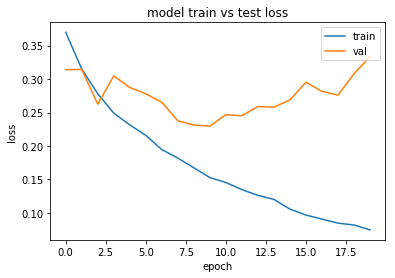

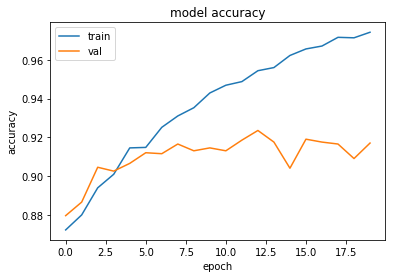

In [18]:
from matplotlib import pyplot

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs test loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper right')
pyplot.show()

# summarize history for accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

In [19]:
#PREDICT
y_pred = model.predict(x_test, verbose= 1, batch_size= 32)
y_pred= y_pred.round().astype(int)
y_test = y_test.astype(int)

#PRINT OUT SOME METRICS
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

print('ACCURACY', accuracy_score(y_test, y_pred))
print('ROC_AUC', roc_auc_score(y_test, y_pred))
print("F1_SCORE", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

30000/30000 [==============================] - 34s 1ms/step
ACCURACY 0.9193
ROC_AUC 0.7428497218266514
F1_SCORE 0.9549824280853121
             precision    recall  f1-score   support

          0       0.77      0.51      0.61      3742
          1       0.93      0.98      0.95     26258

avg / total       0.91      0.92      0.91     30000



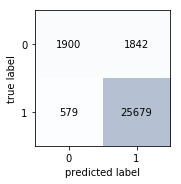

In [20]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()